# Imports

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import pandas
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report


# 1.1 Data preparation

In [16]:
data = pandas.read_csv("glass_dataset.csv")
classes = ["1", "2", "3", "4", "5", "6", "7"]
inputs = data.values[:, :-1] # Features of the glass
targets = np.array([classes.index(str(int(cls))) for cls in data.values[:, -1]]) + 1 # Label of the type of glass (1-7)


In [17]:
print(inputs) 

[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.52065 14.36     0.      ...  8.44     1.64     0.     ]
 [ 1.51651 14.38     0.      ...  8.48     1.57     0.     ]
 [ 1.51711 14.23     0.      ...  8.62     1.67     0.     ]]


In [18]:
print(targets) 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6
 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [19]:
scaler = StandardScaler()
scaled_inputs = scaler.fit_transform(inputs)
compressed = PCA(n_components=4).fit_transform(scaled_inputs)

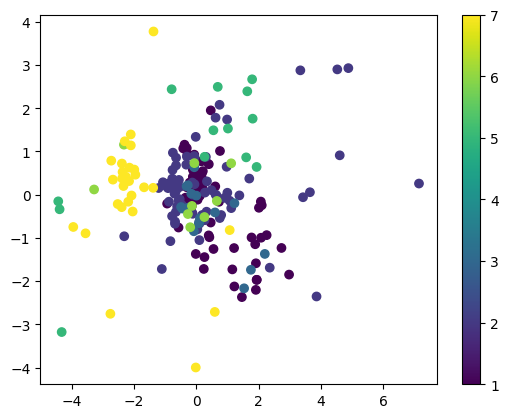

In [52]:
# Plot the resulting PCA embedding .
plt.figure()
plt.scatter(compressed[:,0],compressed [:,-1],c=targets,cmap ="viridis")
plt.colorbar()
#plt.savefig("glass_PCA.pdf", bbox_inches ="tight")
plt.show()

# 1.2 Classifcation 

## KNN

### PCA Investigation

In [21]:
def evaluate_knn(k_range, pca_range):
    plt.figure(figsize=(10, 5))
    for i in range(0,2):
        for p in pca_range:
            train_scores = []
            test_scores = []
            compressed = PCA(n_components=p).fit_transform(scaled_inputs)
            x_train, x_test, t_train, t_test = train_test_split(compressed, targets, random_state=42)
            for k in k_range:
                k_classifier = KNeighborsClassifier(n_neighbors=k)
                k_classifier.fit(x_train, t_train)
                if i%2 != 0:
                    test_accuracy = k_classifier.score(x_test, t_test)
                    test_scores.append(test_accuracy)
                else:
                    train_accuracy = k_classifier.score(x_train, t_train)
                    train_scores.append(train_accuracy)
            if i%2 != 0:
                plt.plot(k_range, test_scores, marker='o', linestyle='-', label=f'PCA={p}')
            else:
                plt.plot(k_range, train_scores, marker='o', linestyle='-', label=f'PCA={p}')
        if i%2 != 0:
            plt.ylabel("Testing Accuracy")
            plt.title("KNN Testing Accuracy for Different PCA Components")
            #savefig = "knn_testing_accuracy.pdf"
        else:
            plt.ylabel("Training Accuracy")
            plt.title("KNN Training Accuracy for Different PCA Components")
            #savefig = "knn_training_accuracy.pdf"
        plt.xlabel("K (Number of Neighbors)")
        plt.xticks(k_range)
        plt.yticks(np.linspace(0.5, 1, 11))
        plt.grid(True)
        plt.legend()
        #plt.savefig(savefig, bbox_inches="tight")
        plt.show()

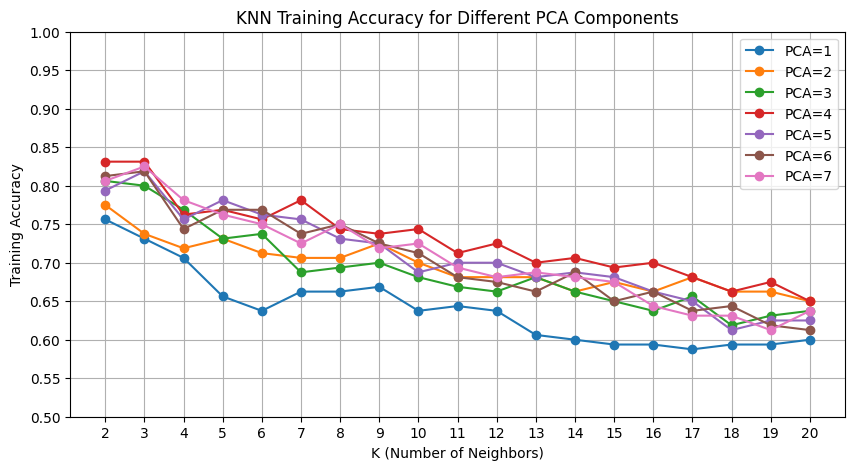

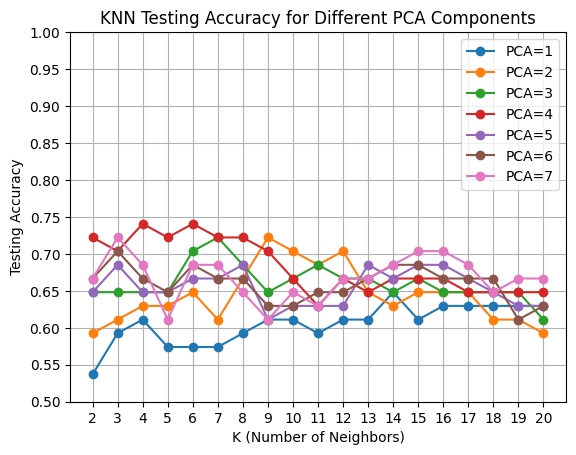

In [22]:
k_range = range(2, 21)
pca_range = range(1, 8)
evaluate_knn((k_range), (pca_range))

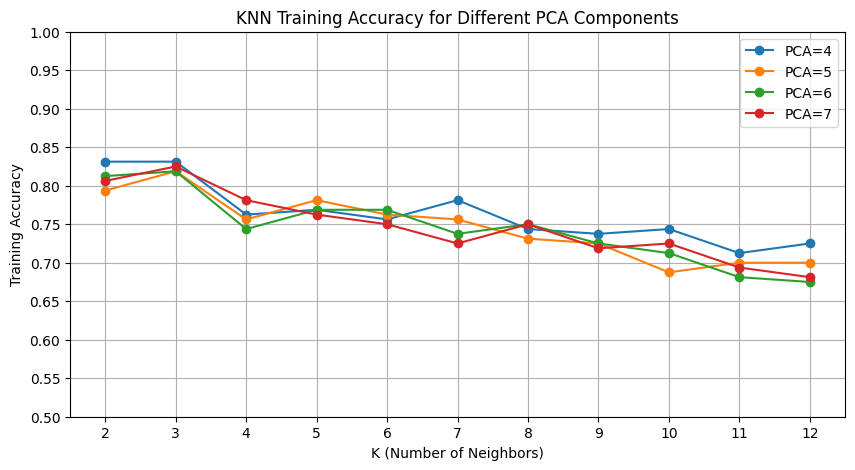

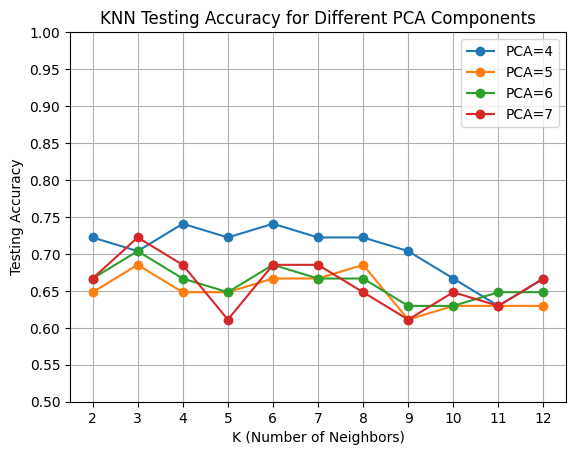

In [23]:
k_range = range(2, 13)
pca_range = range(4, 8)
evaluate_knn((k_range), (pca_range))

### Final KNN

In [ ]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs)
x_train, x_test, t_train, t_test = train_test_split(compressed, targets, random_state=42)
k_classifier = KNeighborsClassifier(n_neighbors=6).fit(x_train, t_train)
classified_data = k_classifier.predict(x_test)  
train_accuracy = k_classifier.score(x_train, t_train)
test_accuracy = k_classifier.score(x_test, t_test)
print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")
print(classified_data)


Train accuracy: 0.75625
Test accuracy: 0.7407407407407407
[1 7 1 7 2 2 1 2 2 1 2 2 1 2 6 5 7 1 1 7 2 7 7 7 1 1 1 1 5 1 1 2 2 2 1 7 5
 1 1 2 1 7 2 2 1 2 2 2 2 1 1 1 1 2]


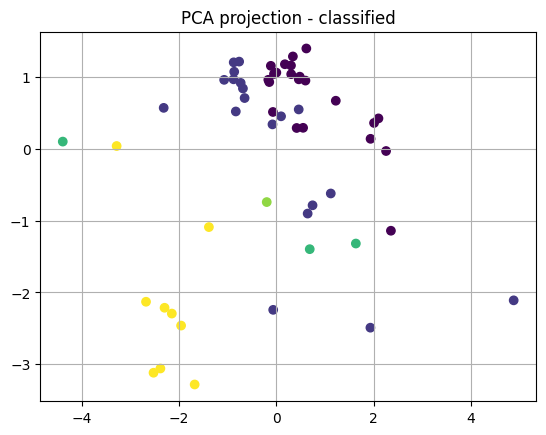

In [ ]:
plt.figure()
plt.scatter(x_test[:,0], x_test[:,1], c=classified_data, cmap='viridis')
plt.title("PCA projection - classified")
plt.grid(True)
#plt.savefig("glass_knn_pca_classified.pdf", bbox_inches ="tight")
plt.show()

### Conclusion of KNN
PCA 4 is best for KNN model, with 6 neighbours for balance, with a small variance between train and test accuracy, meaning overfitting is unlikely (around 2-3% difference)


## SVM 

### Kernel Investigation

#### PCA Investigation

In [26]:
def evalute_pca_svm(pca):
    compressed = PCA(n_components=pca).fit_transform(scaled_inputs)
    x_train,x_test,t_train,t_test = train_test_split(compressed,targets, random_state= 42)
    kernel_range = ["linear", "poly2", "poly3","rbf", "sigmoid"]
    training_scores = []
    test_scores = []
    for k in kernel_range:
        if k == 'poly2':
            svm_classifier = SVC(kernel="poly", degree= 2, gamma='auto').fit(x_train,t_train)
        elif k == 'poly3':
            svm_classifier = SVC(kernel="poly", degree= 3, gamma='auto').fit(x_train,t_train) 
        else:
            svm_classifier = SVC(kernel=k, gamma='auto').fit(x_train,t_train) 
        y_train = svm_classifier.predict(x_train)
        y_test = svm_classifier.predict(x_test) 
        training_scores.append(accuracy_score(t_train,y_train))
        test_scores.append(accuracy_score(t_test,y_test))

    plt.figure(figsize=(8, 6))
    plt.title(f"SVM Accuracy with Different Kernels with PCA {pca}")
    x = np.arange(len(kernel_range))
    width = 0.3
    plt.bar(x - width/2, training_scores, width, label='Training Accuracy', color='blue')
    plt.bar(x + width/2, test_scores, width, label='Test Accuracy', color='red')

    plt.xlabel("Kernel")
    plt.ylabel("Accuracy")
    plt.xticks(x, kernel_range)
    plt.yticks(np.linspace(0, 1, 21)) 

    plt.legend()
    plt.grid(True, axis='y')
    #plt.savefig(f"svm_kernel_pca_{pca}.pdf", bbox_inches="tight")
    plt.show()


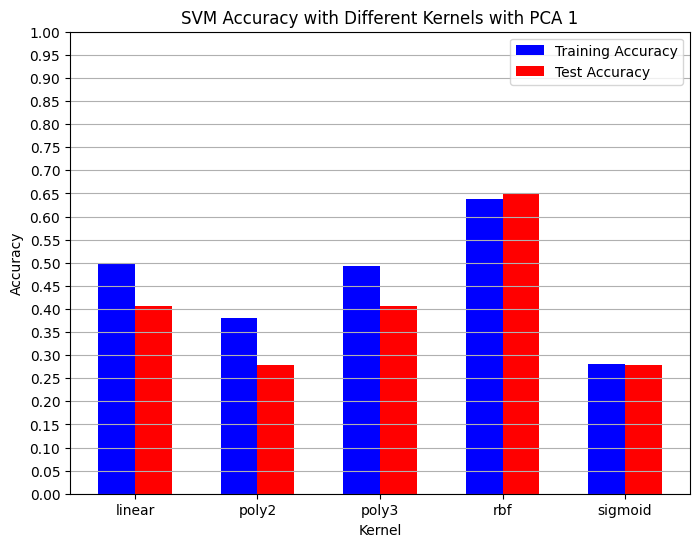

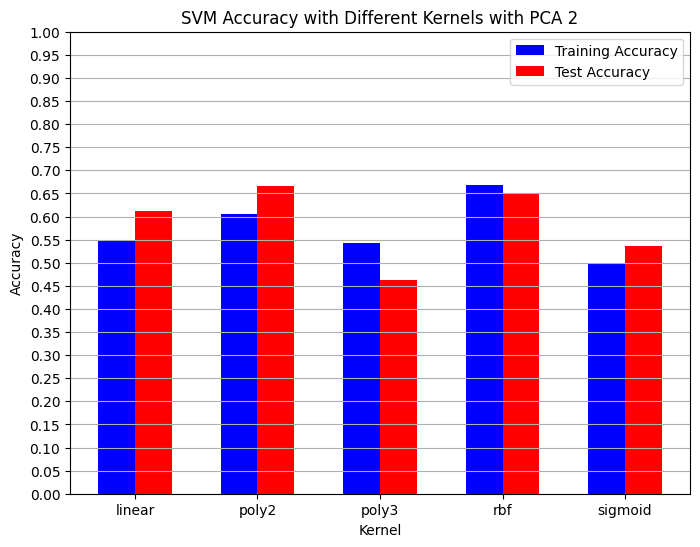

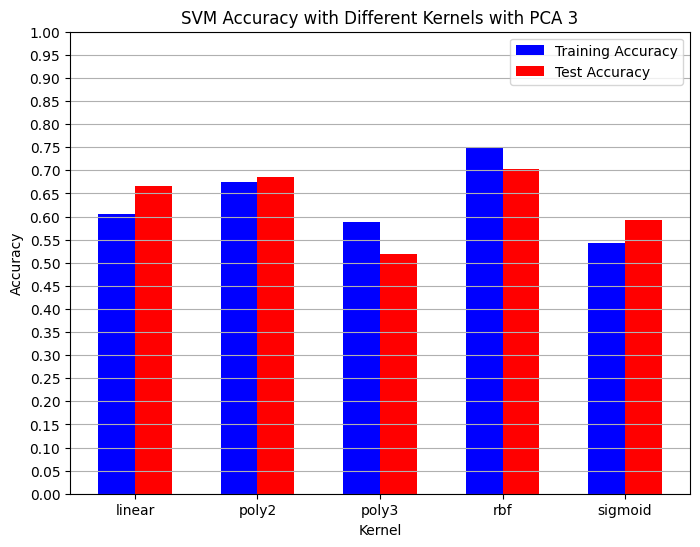

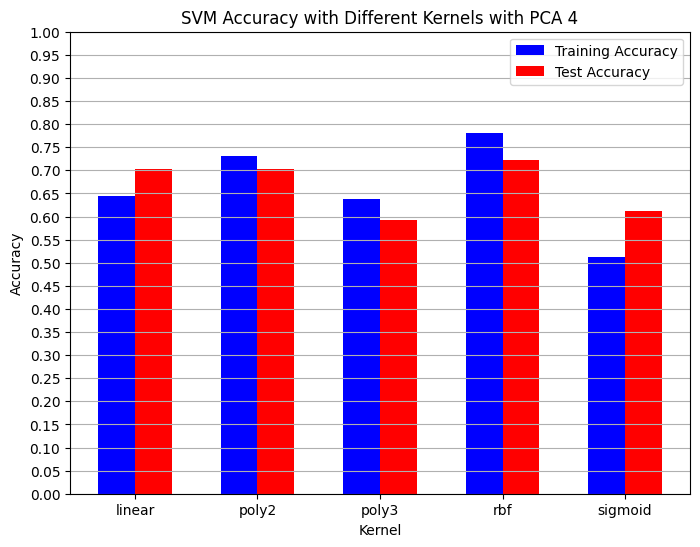

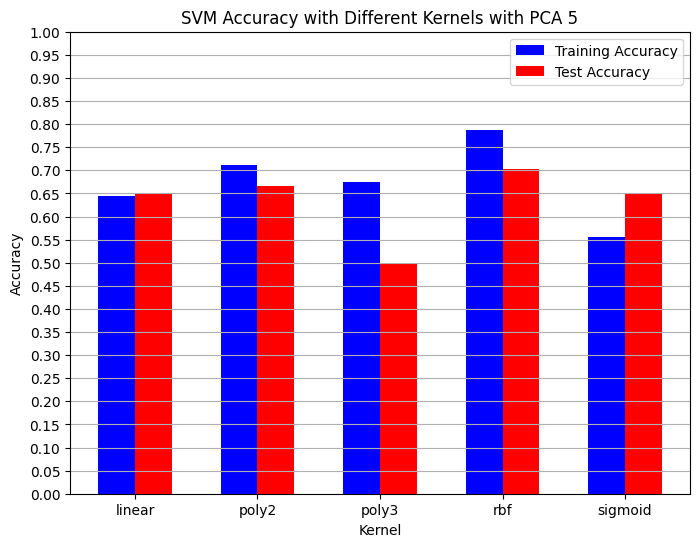

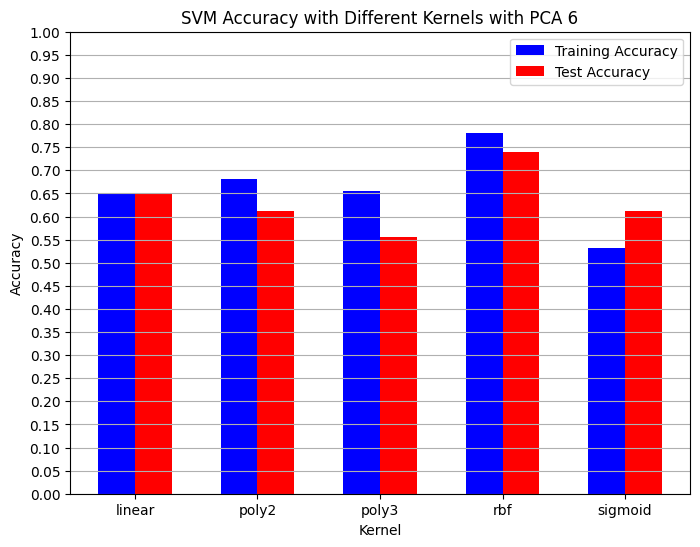

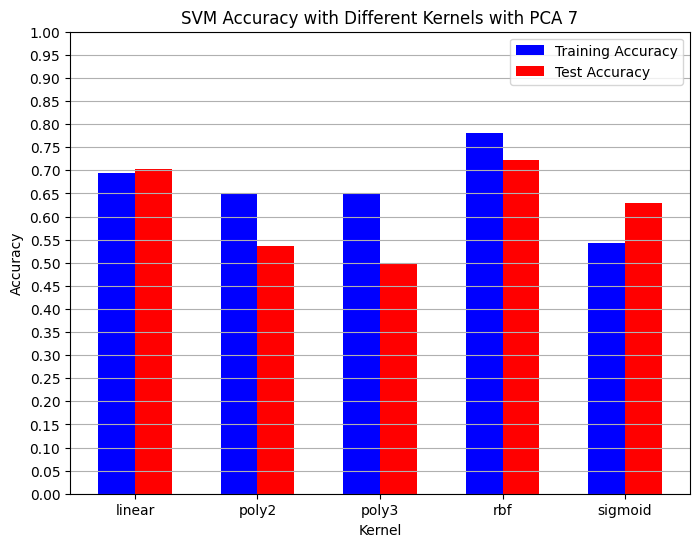

In [27]:
for i in range(1, 8):
    evalute_pca_svm(i)

##### Conclusion of PCA investigation
PCA 5  and 4 achieves highest accuracy with RBF but potentially overfitting, with the primarily diffence being that PCA 4 is more suitable when using all kernels, whereas PCA 5 only really benefits RBF.

Moreover, PCA 6 offers the best generalisation with RBF kernel with the lowest variance between training and testing accuracy.

PCA 3 and lower offers too low of an accuracy to be worth any consideration.

A PCA higher than 6 offers little accuracy increases for the increased complexity, making it not worthwhile to investigate.

It is worth noting that there is no reguarlisation or gamma values cross validation implemented at this stage.

In conclusion, PCA 4 is going to be chosen as that matches KNN model and SVM models best, to find the best middle ground of performance and accuracy, reducing the total of 9 elements to 4. In particular for the SVM models, it means the best average performance for each kernel. 

In [28]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs)

#### Hyperparameter tuning for Linear

In [29]:
c_range = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5,1.75, 2, 2.5,3]
train_scores = []
test_scores =  []
for c in (c_range):
    svm_classifier = SVC(kernel="linear", C=c).fit(x_train, t_train) 
    y_train = svm_classifier.predict(x_train)
    y_test = svm_classifier.predict(x_test)
    
    train_scores.append(accuracy_score(t_train, y_train))
    test_scores.append(accuracy_score(t_test, y_test))

##### Results - Test and Training accuracy

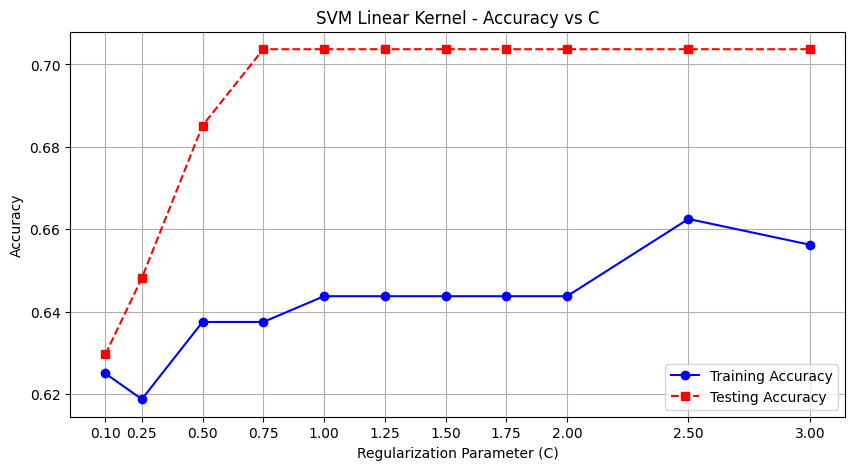

In [30]:
plt.figure(figsize=(10, 5))
plt.title("SVM Linear Kernel - Accuracy vs C")
plt.plot(c_range, train_scores, marker='o', label="Training Accuracy", linestyle='-', color='blue')
plt.plot(c_range, test_scores, marker='s', label="Testing Accuracy", linestyle='--', color='red')
plt.xticks(c_range) 
plt.xlabel("Regularization Parameter (C)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
#plt.savefig("Linear_cross_validation.pdf", bbox_inches="tight")
plt.show()

#### Hyperparameter tuning for RDF

In [31]:
gamma_range = np.linspace(0.1, 4.0, 40)
c_range = [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 2,2.25,2.5,2.75,3]

train_scores = np.zeros((len(gamma_range), len(c_range)))
test_scores = np.zeros((len(gamma_range), len(c_range)))

for x, g in enumerate(gamma_range):
    for y, c in enumerate(c_range):
        svm_classifier = SVC(kernel="rbf", gamma=g, C=c).fit(x_train, t_train)
        y_train = svm_classifier.predict(x_train)
        y_test = svm_classifier.predict(x_test)
        
        train_scores[x, y] = accuracy_score(t_train, y_train)
        test_scores[x, y] = accuracy_score(t_test, y_test)

##### Results - Training accuracy

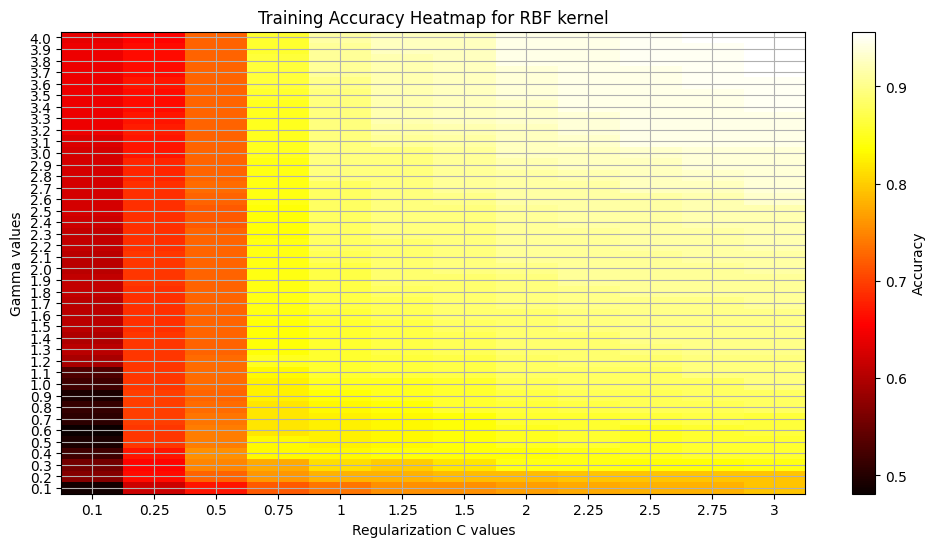

In [32]:
# Training accuracy heatmap for RBF kernel
plt.figure(figsize=(12, 6))
plt.title("Training Accuracy Heatmap for RBF kernel")
plt.subplot(1, 1, 1)
plt.imshow(train_scores, interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), c_range)
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range, 2))
plt.grid(True)
#plt.savefig("RBF_training_accuracy_heatmap.pdf", bbox_inches="tight")
plt.show()

##### Results - Test accuracy

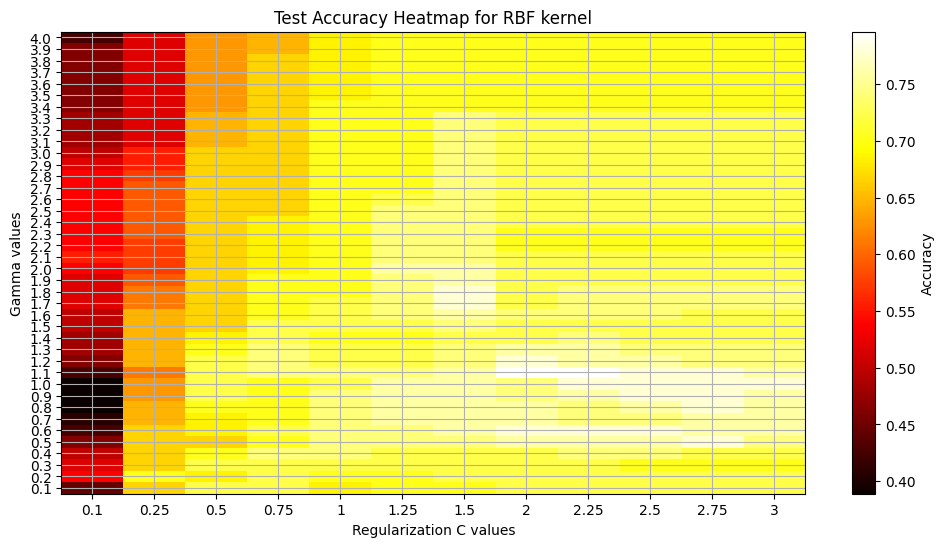

In [33]:
# Test accuracy heatmap for RFD kernel
plt.figure(figsize=(12, 6))
plt.title("Test Accuracy Heatmap for RBF kernel")
plt.imshow(test_scores, interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), c_range)
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range,2))
plt.grid(True)
#plt.savefig("RBF_test_accuracy_heatmap.pdf", bbox_inches="tight")
plt.show()

#### Hyperparameter tuning for Polynominal

In [34]:
gamma_range = np.linspace(0.1, 3.0, 30)
c_range = np.linspace(0.1, 3.0, 30)
coef0_range = np.linspace(0.5, 3.0, 6)

train_scores_poly_2 = np.zeros((len(gamma_range), len(c_range), len(coef0_range)))
test_scores_poly_2 = np.zeros((len(gamma_range), len(c_range), len(coef0_range)))

for x, g in enumerate(gamma_range):  
    for y, c in enumerate(c_range): 
        for z, cf in enumerate(coef0_range):  
            svm_classifier = SVC(kernel="poly", degree=2, gamma=g, C=c, coef0=cf).fit(x_train, t_train)
            y_train = svm_classifier.predict(x_train)
            y_test = svm_classifier.predict(x_test)

            train_scores_poly_2[x, y, z] = accuracy_score(t_train, y_train)
            test_scores_poly_2[x, y, z] = accuracy_score(t_test, y_test)


##### Results for Poly degree 2 - Training accuracy

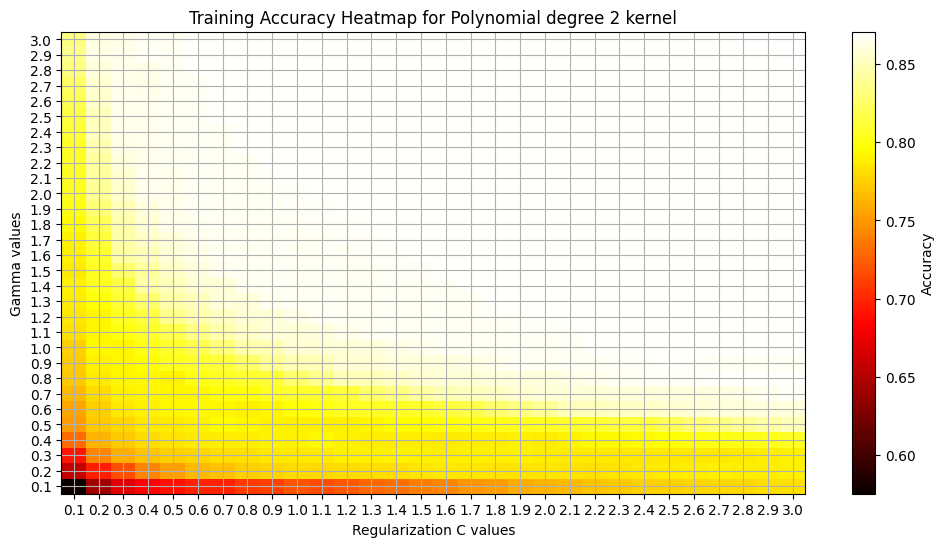

In [35]:
# Training accuracy heatmap for Polynomial degree 2 kernel using average of ceof0 value
plt.figure(figsize=(12, 6))
plt.title("Training Accuracy Heatmap for Polynomial degree 2 kernel")
plt.imshow(train_scores_poly_2.mean(axis=2), interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), np.round(c_range, 2))
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range, 2))
plt.grid(True)
#plt.savefig("poly2_training_accuracy_heatmap.pdf", bbox_inches="tight")
plt.show()

##### Results for Poly degree 2 - Test accuracy

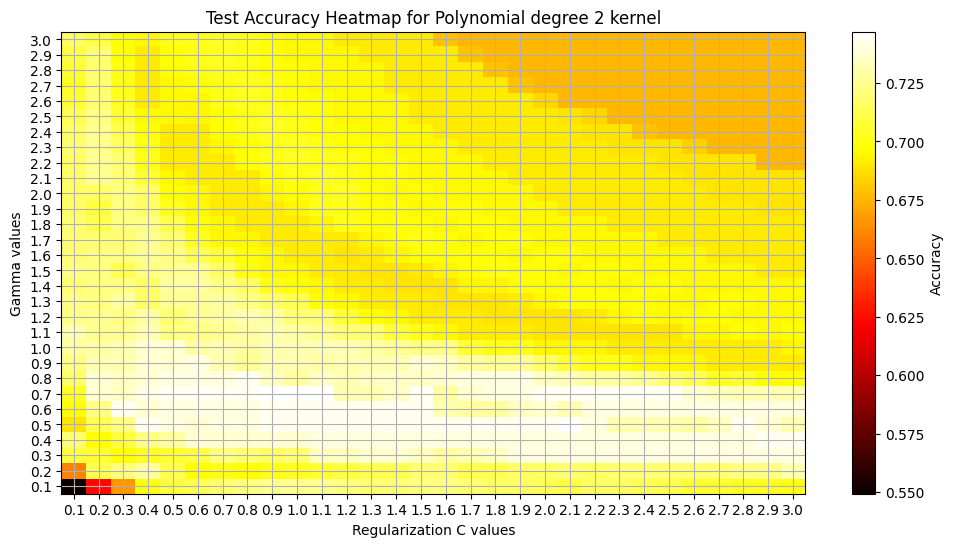

In [36]:
# Test accuracy heatmap for Polynomial degree 2 kernel using average of ceof0 value
plt.figure(figsize=(12, 6))
plt.title("Test Accuracy Heatmap for Polynomial degree 2 kernel")
plt.imshow(test_scores_poly_2.mean(axis=2), interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), np.round(c_range, 2))
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range, 2))
plt.grid(True)
#plt.savefig("poly2_test_accuracy_heatmap.pdf", bbox_inches="tight")
plt.show()

In [37]:
gamma_range = np.linspace(0.1, 3.0, 30)
c_range = np.linspace(0.1, 3.0, 30)
coef0_range = np.linspace(0.5, 3.0, 6)
train_scores_poly_3 = np.zeros((len(gamma_range), len(c_range), len(coef0_range)))
test_scores_poly_3 = np.zeros((len(gamma_range), len(c_range), len(coef0_range)))

for x, g in enumerate(gamma_range):  
    for y, c in enumerate(c_range): 
        for z, cf in enumerate(coef0_range):  
            svm_classifier = SVC(kernel="poly", degree=3, gamma=g, C=c, coef0=cf).fit(x_train, t_train)
            y_train = svm_classifier.predict(x_train)
            y_test = svm_classifier.predict(x_test)

            train_scores_poly_3[x, y, z] = accuracy_score(t_train, y_train)
            test_scores_poly_3[x, y, z] = accuracy_score(t_test, y_test)

##### Results for Poly degree 3 - Training accuracy

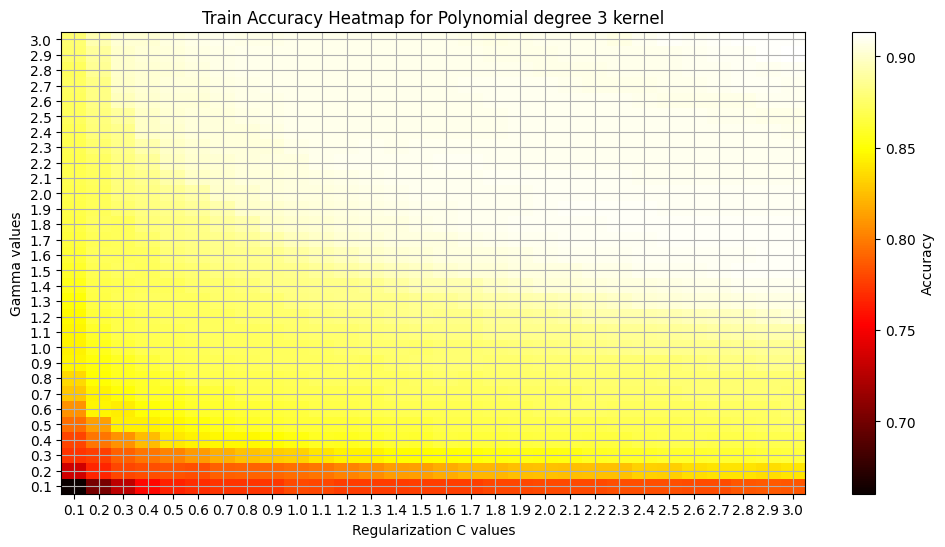

In [38]:
# Train accuracy heatmap for Polynomial degree 3 kernel using average of ceof0 value
plt.figure(figsize=(12, 6))
plt.title("Train Accuracy Heatmap for Polynomial degree 3 kernel")
plt.imshow(train_scores_poly_3.mean(axis=2), interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), np.round(c_range, 2))
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range, 2))
plt.grid(True)
#plt.savefig("poly3_train_accuracy_heatmap.pdf", bbox_inches="tight")
plt.show()

##### Results for Poly degree 3 - Test accuracy

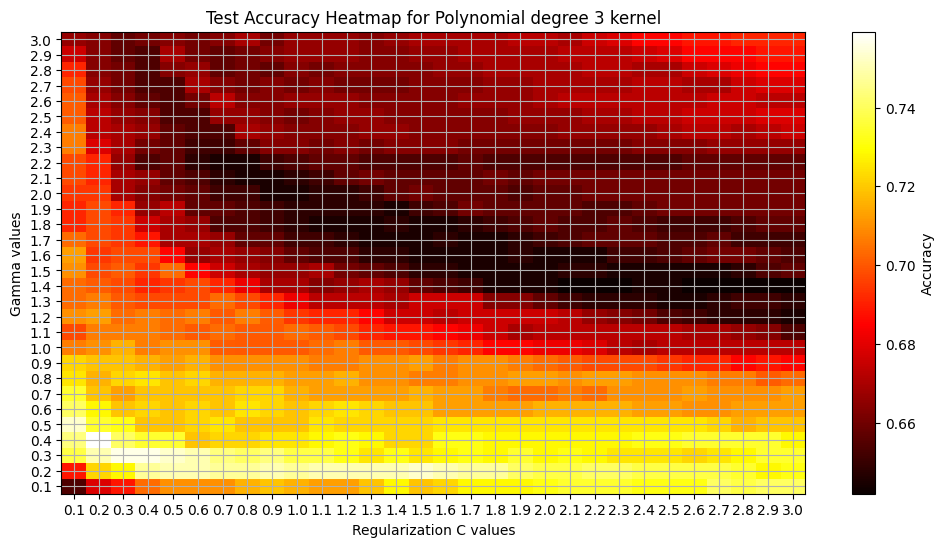

In [39]:
# Test accuracy heatmap for Polynomial degree 3 kernel using average of ceof0 value
plt.figure(figsize=(12, 6))
plt.title("Test Accuracy Heatmap for Polynomial degree 3 kernel")
plt.imshow(test_scores_poly_3.mean(axis=2), interpolation='nearest', cmap=plt.cm.hot, aspect='auto', origin='lower')
plt.colorbar(label='Accuracy')
plt.xlabel('Regularization C values')
plt.ylabel('Gamma values')
plt.xticks(np.arange(len(c_range)), np.round(c_range, 2))
plt.yticks(np.arange(len(gamma_range)), np.round(gamma_range, 2))
plt.grid(True)
#plt.savefig("poly3_test_accuracy_heatmap.pdf", bbox_inches="tight")
plt.show()

### Gridsearch

In [40]:
parameters = { 
    'C': [0.1,1,1.1,2,3,10, 100,500,150,1000],
    'gamma': ['scale', 'auto', 0.01,0.1,0.15,0.25,0.5,0.75,1,1.1,1.2,1.25,1.5,1.75,2,10]
}

svm_classifier = SVC(kernel="rbf")

grid_search = GridSearchCV(svm_classifier, parameters, cv=5, scoring='accuracy')

grid_search.fit(x_train, t_train)
print(f"Best Parameters: {grid_search.best_params_}")

best_model = grid_search.best_estimator_

y_test = best_model.predict(x_test)
y_test = best_model.predict(x_test)

train_accuracy= accuracy_score(t_train, y_train)
test_accuracy = accuracy_score(t_test, y_test)

print(f"RBF Parameters GridSearch Accuracy: {train_accuracy} training accuracy, {test_accuracy} testing accuracy")

Best Parameters: {'C': 100, 'gamma': 0.1}
RBF Parameters GridSearch Accuracy: 0.93125 training accuracy, 0.7407407407407407 testing accuracy


In [41]:
svm_classifier_grid = SVC(kernel="rbf",gamma=0.1,C=100).fit(x_train, t_train) 
# RBF : 0.86875 training accuracy, 0.7407407407407407 testing accuracy

y_train = svm_classifier_grid.predict(x_train)
y_test = svm_classifier_grid.predict(x_test)

train_accuracy = accuracy_score(t_train, y_train)
test_accuracy= accuracy_score(t_test, y_test)
print(f"RBF Parameters GridSearch Accuracy: {train_accuracy} training accuracy, {test_accuracy} testing accuracy")


RBF Parameters GridSearch Accuracy: 0.86875 training accuracy, 0.7407407407407407 testing accuracy


In [42]:
parameters = [
    {
        'kernel': ['poly'],'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100],'gamma': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 'scale'],
        'degree': [2, 3],
        'coef0': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5]
    },
    {
        'kernel': ['rbf'], 'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100],'gamma': [0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2, 2.25, 2.5, 2.75, 3, 'scale']
    },
    {
        'kernel': ['linear'],'C': [0.1, 0.5, 1, 1.5, 2, 2.5, 3, 10, 100]
    }
]

grid = GridSearchCV(
    SVC(), # model
    parameters, #parameters to tune
    scoring='accuracy', #evaluation metric
    cv=9, #number of cross validation
    verbose=1, #  to print the progress
    n_jobs=-1  # how many cores to use in parallel
)

grid.fit(compressed, targets)
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score: {grid.best_score_:.4f}")

best_model = grid.best_estimator_
# {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'} #found by grid search
# {'C': 0.5, 'coef0': 0.25, 'degree': 3, 'gamma': 2, 'kernel': 'poly'} #found by grid search
# svm_classifier_poly = SVC(kernel="poly", degree=2, gamma=2.5, C=0.9).fit(x_train, t_train) #more generalised found by me
# Best parameters: {'C': 10, 'coef0': 2, 'degree': 2, 'gamma': 0.75, 'kernel': 'poly'}
# Best parameters: {'C': 1, 'coef0': 1, 'degree': 3, 'gamma': 0.75, 'kernel': 'poly'}


Fitting 9 folds for each of 2907 candidates, totalling 26163 fits
Best parameters: {'C': 1, 'coef0': 1, 'degree': 3, 'gamma': 0.75, 'kernel': 'poly'}
Best cross-validation score: 0.7248


#### Gridsearch results

In [43]:
#Fitting 9 folds for each of 2907 candidates, totalling 26163 fits
#Best parameters: {'C': 1, 'coef0': 1, 'degree': 3, 'gamma': 0.75, 'kernel': 'poly'}
#Best cross-validation score: 0.7248

compressed = PCA(n_components=4).fit_transform(scaled_inputs) 
x_train, x_test, t_train, t_test = train_test_split(compressed, targets, random_state=42)
svm_classifier_grid_search = SVC(kernel="poly", degree=3, gamma=0.75, C=1, coef0=1).fit(x_train, t_train)

y_train_best = svm_classifier_grid_search.predict(x_train)
y_test_best = svm_classifier_grid_search.predict(x_test)

train_accuracy_best = accuracy_score(t_train, y_train_best)
test_accuracy_best = accuracy_score(t_test, y_test_best)
print(f"Polynomial kernel with best parameters: {train_accuracy_best} training accuracy, {test_accuracy_best} testing accuracy")


Polynomial kernel with best parameters: 0.86875 training accuracy, 0.7037037037037037 testing accuracy


### Conclusion of SVM

This is the best verisons of each kernel using the results from the heatmaps and the gridsearchs

#### Linear

In [44]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs) 
x_train,x_test,t_train,t_test = train_test_split (compressed,targets, random_state= 42)
svm_classifier_manual = SVC(kernel="linear", C=0.75).fit(x_train, t_train) 
# 2.50 has a higher training accuracy but same testing accuracy, so I chose 0.75 for better generalisation

y_train_manual = svm_classifier_manual.predict(x_train)
y_test_manual = svm_classifier_manual.predict(x_test)

train_accuracy_manual = accuracy_score(t_train, y_train_manual)
test_accuracy_manual = accuracy_score(t_test, y_test_manual)
print(f"Linear kernel: {train_accuracy_manual} training accuracy, {test_accuracy_manual} testing accuracy")
#Linear kernel: 0.6625 training accuracy, 0.7037037037037037 testing accuracy


Linear kernel: 0.6375 training accuracy, 0.7037037037037037 testing accuracy


#### RBF

In [45]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs) 
x_train,x_test,t_train,t_test = train_test_split (compressed,targets, random_state= 42)
svm_classifier_manual = SVC(kernel="rbf",gamma=1.1,C=2).fit(x_train, t_train) 

y_train_manual = svm_classifier_manual.predict(x_train)
y_test_manual = svm_classifier_manual.predict(x_test)

train_accuracy_manual = accuracy_score(t_train, y_train_manual)
test_accuracy_manual = accuracy_score(t_test, y_test_manual)
print(f"RBF kernel: {train_accuracy_manual} training accuracy, {test_accuracy_manual} testing accuracy")
#RBF kernel: 0.88125 training accuracy, 0.7962962962962963 testing accuracy



RBF kernel: 0.88125 training accuracy, 0.7962962962962963 testing accuracy


#### Polynominal

##### Polynominal degree 2

In [46]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs) 
x_train,x_test,t_train,t_test = train_test_split (compressed,targets, random_state= 42)
svm_classifier_manual = SVC(kernel="poly",degree = 2,gamma=0.5,C=1.1,coef0=0.5142857142857142).fit(x_train, t_train) 

y_train_manual = svm_classifier_manual.predict(x_train)
y_test_manual = svm_classifier_manual.predict(x_test)

train_accuracy_manual = accuracy_score(t_train, y_train_manual)
test_accuracy_manual = accuracy_score(t_test, y_test_manual)
print(f"Polynominal kernel manual: {train_accuracy_manual} training accuracy, {test_accuracy_manual} testing accuracy")
#Polynominal kernel: 0.79375 training accuracy, 0.7777777777777778 testing accuracy


Polynominal kernel manual: 0.79375 training accuracy, 0.7222222222222222 testing accuracy


##### Polynominal degree 3

In [47]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs) 
x_train,x_test,t_train,t_test = train_test_split (compressed,targets, random_state= 42)
svm_classifier_manual = SVC(kernel="poly",degree = 3,gamma=0.9285714285714285,C=0.30714285714285716,coef0=0.5142857142857142).fit(x_train, t_train) 

y_train_manual = svm_classifier_manual.predict(x_train)
y_test_manual = svm_classifier_manual.predict(x_test)

train_accuracy_manual = accuracy_score(t_train, y_train_manual)
test_accuracy_manual = accuracy_score(t_test, y_test_manual)
print(f"Polynominal kernal manual: {train_accuracy_manual} training accuracy, {test_accuracy_manual} testing accuracy")
#Polynominal kernel: 0.8375 training accuracy, 0.7777777777777778 testing accuracy



Polynominal kernal manual: 0.8375 training accuracy, 0.7777777777777778 testing accuracy


# 1.3 Assessment of classification

The two best models of KNN and SVM are:

- PCA 4 is best for KNN model, with 6 neighbours for balance, with a small variance between train and test accuracy, meaning overfitting is unlikely (around 2-3% difference)

- PCA 4 with RBF and polynominal degree 2 are the best SVM models. There is an argument to be made that RBF could potentially be overfitting as the difference between the training and testing accuracy is far wider, however it does provide with greater test accuracy.  Given the data from the PCA analysis and its higher test accuracy, I'm going to stick with the RBF model. 

Polynominal kernal: 0.79375 training accuracy, 0.7777777777777778 testing accuracy

RBF kernel: 0.88125 training accuracy, 0.7962962962962963 testing accuracy



## Cross validation

In [11]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs) 
x_train,x_test,t_train,t_test = train_test_split (compressed,targets, random_state= 42)
svm_classifier = SVC(kernel="rbf",gamma=1.1,C=2)

kernel_cv_scores = cross_val_score(svm_classifier, compressed, targets, cv=9)
print(f"Cross-validation scores: {kernel_cv_scores}") 
print(f"Mean cross-validation accuracy: {np.mean(kernel_cv_scores)}")

svm_classifier = svm_classifier.fit(x_train, t_train)

y_train_manual = svm_classifier.predict(x_train)
y_test_manual = svm_classifier.predict(x_test)

train_accuracy_manual = accuracy_score(t_train, y_train_manual)
test_accuracy_manual = accuracy_score(t_test, y_test_manual)
print(f"RBF kernel: {train_accuracy_manual} training accuracy, {test_accuracy_manual} testing accuracy")
#RBF kernel: 0.88125 training accuracy, 0.7962962962962963 testing accuracy

Cross-validation scores: [0.58333333 0.75       0.70833333 0.625      0.83333333 0.79166667
 0.625      0.69565217 0.56521739]
Mean cross-validation accuracy: 0.6863929146537843
RBF kernel: 0.88125 training accuracy, 0.7962962962962963 testing accuracy


In [12]:
compressed = PCA(n_components=4).fit_transform(scaled_inputs)
x_train, x_test, t_train, t_test = train_test_split(compressed, targets, random_state=42)
k_classifier = KNeighborsClassifier(n_neighbors=6)

knn_cv_scores = cross_val_score(k_classifier, compressed, targets, cv=9)
print(f"Cross-validation scores: {kernel_cv_scores}") 
print(f"Mean cross-validation accuracy: {np.mean(kernel_cv_scores)}")

k_classifer = k_classifier.fit(x_train, t_train)

train_accuracy = k_classifier.score(x_train, t_train)
test_accuracy = k_classifier.score(x_test, t_test)
print(f"KNN model: {train_accuracy} training accuracy, {test_accuracy} testing accuracy")
#KNN model: 0.75625 training accuracy, 0.7407407407407407 testing accuracy


Cross-validation scores: [0.58333333 0.75       0.70833333 0.625      0.83333333 0.79166667
 0.625      0.69565217 0.56521739]
Mean cross-validation accuracy: 0.6863929146537843
KNN model: 0.75625 training accuracy, 0.7407407407407407 testing accuracy


## Boxplot

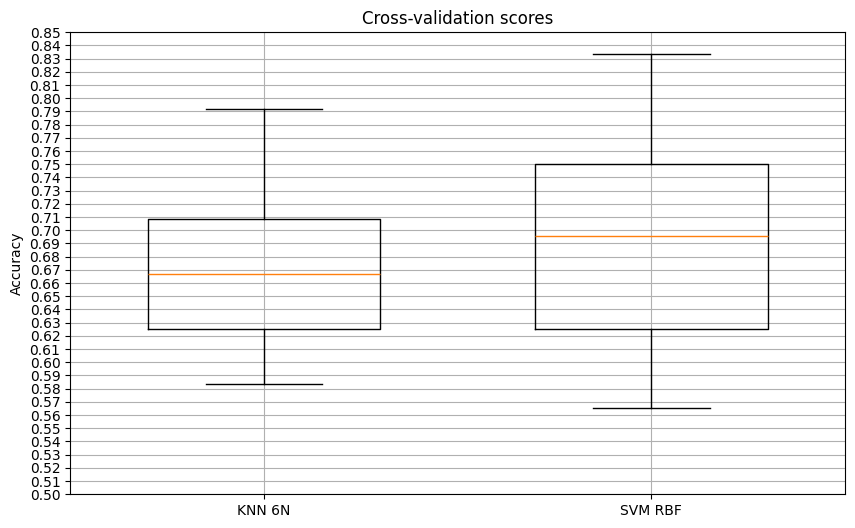

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([knn_cv_scores,kernel_cv_scores], positions=[1,2], widths=0.6)
plt.xticks([1, 2], ['KNN 6N', 'SVM RBF'])
plt.ylabel('Accuracy')
plt.yticks(np.linspace(0.5, 0.85, 36))
plt.title('Cross-validation scores')
plt.grid(True)
#plt.savefig("cv_boxplot.pdf", bbox_inches="tight")
plt.show()


## Summary of results

The boxplot shows that the RBF kernel model on consistently outperforms the KNN model, with an average accuracy increase of 5%, however, this could be as much as 30% accuracy increase. By default, the highest accuracy KNN performs at is around 79%, with the RBF performing at 83.5%. However, the consequence of this is that the RBF performance has a wider spread, having a potential to have the lowest accuracy between the two of around 57% accuracy (2% difference from KNN lowest accuracy).

In conclusion, if more consistency is valued, currently the KNN is the better model. On the other hand, the lowest accuracy of the RBF could be considered marginal disadvantage for the greater consistent 5% increase on average. Furthermore, it is important to know that the RBF could be slightly overfitted for the training data looking at the accuracy result. However, the greater hypertuning potential that the RBF modle could go under to increase the consistency and balance of generalisation is far higher comparitively to the KNN model.  With this in mind, I would say that the RBF is the better model.

# 2.1 Generation of random solutions

## Fitness Functions

In [ ]:
# Fitness functions
def schafferFunction(x,y):
    return 0.5 + (np.sin(x**2 - y**2)**2 - 0.5) / (1 + 0.001 * (x**2 + y**2))**2

def modifiedAckleyFunction(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + 20

def easomFunction(x, y):
    return -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))

## Random Solutions 

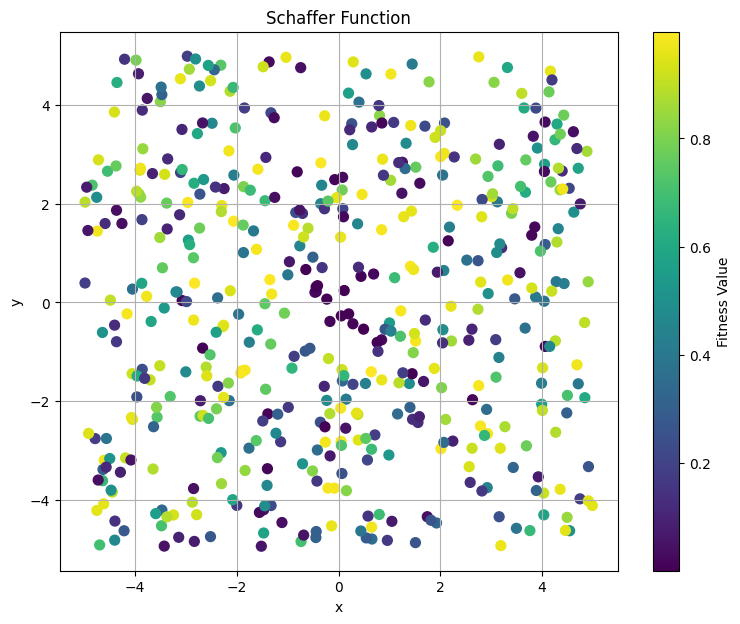

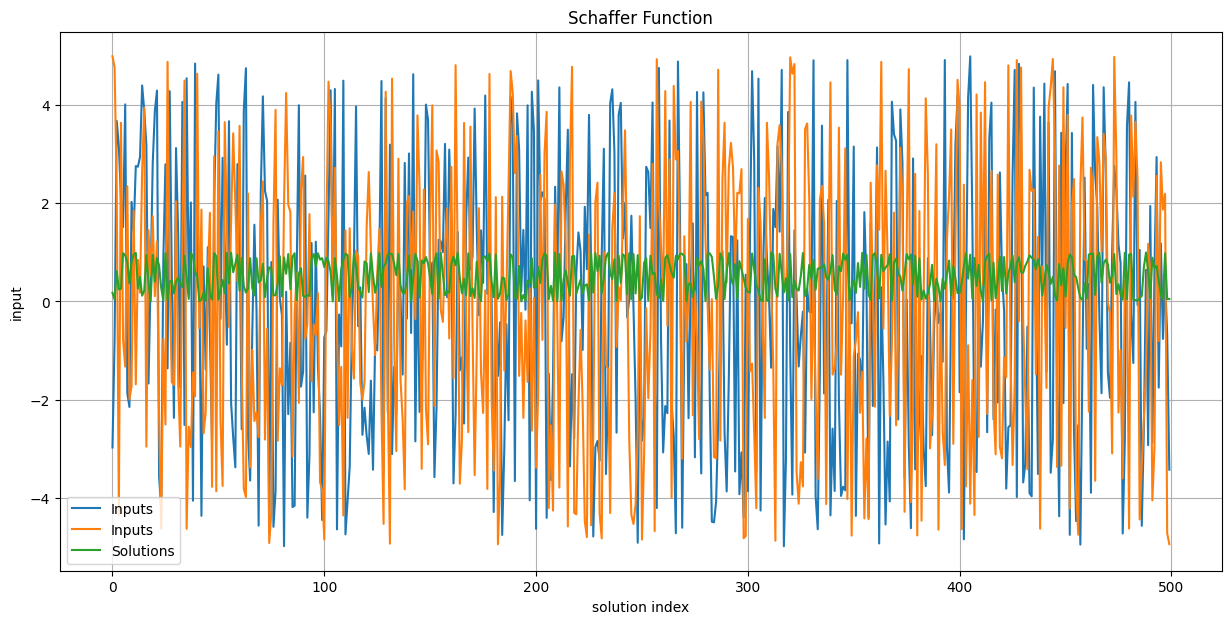

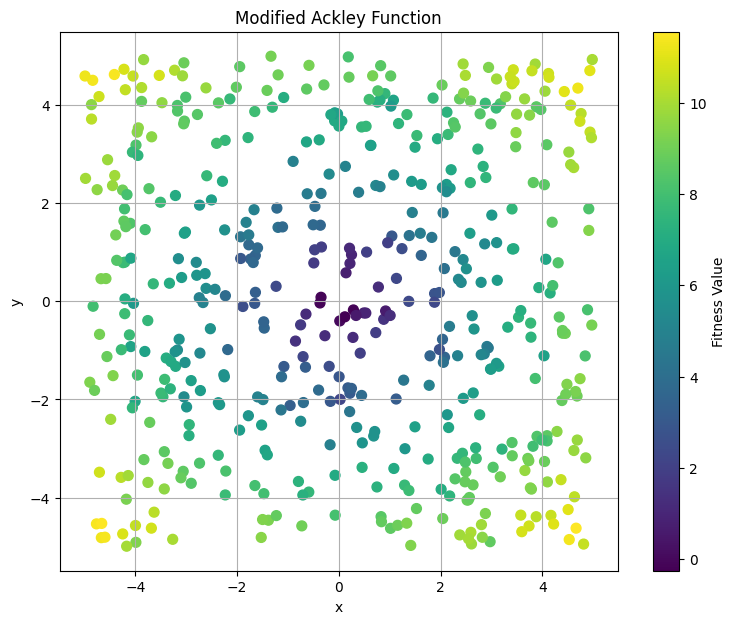

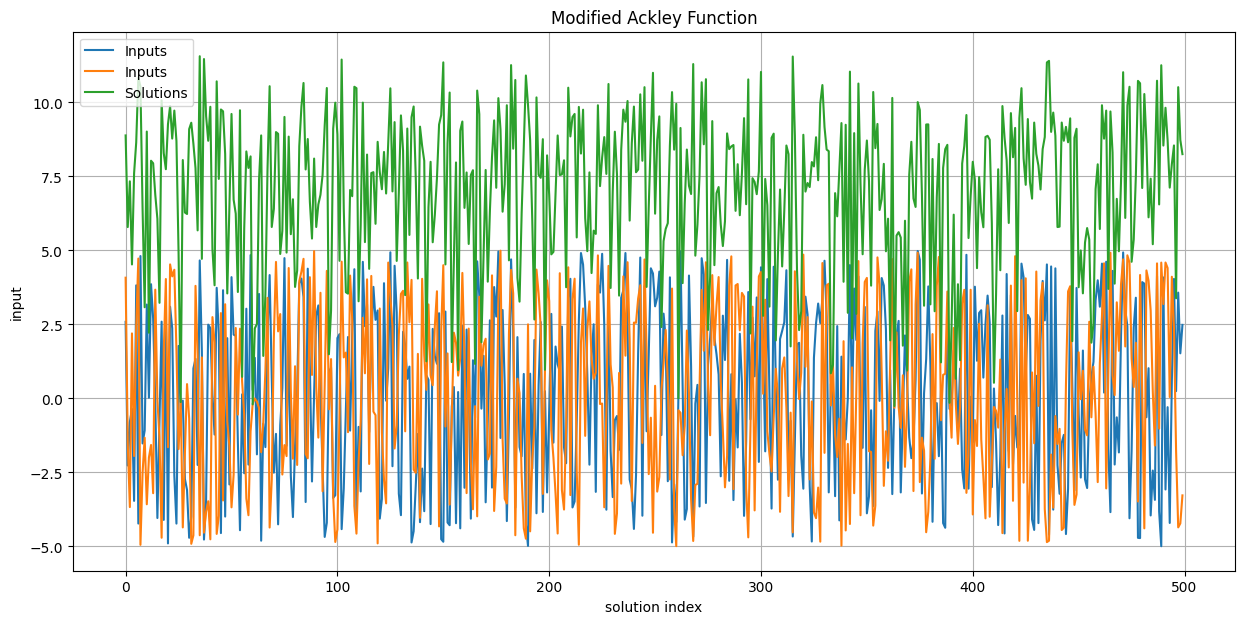

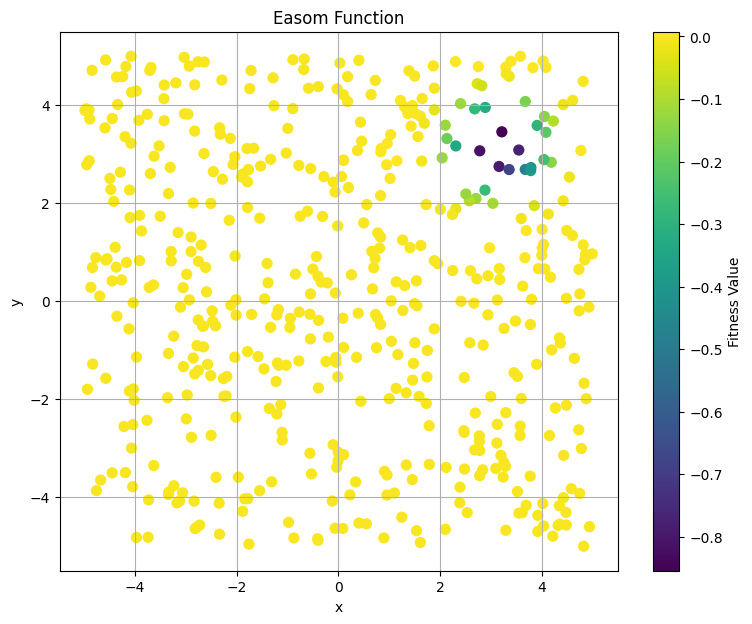

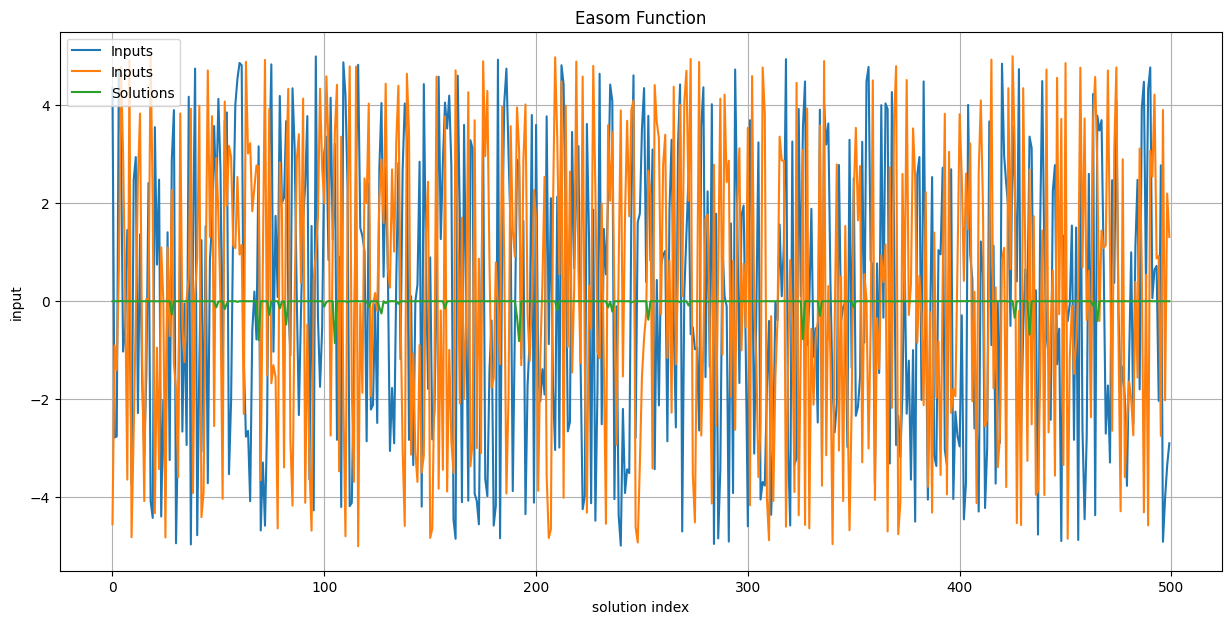

In [54]:
def randomSolutions(input_array,solutions,func, amount_of_solutions):
    for x in range (0,amount_of_solutions):
        input = np.random.uniform(-5,5,2)
        input_array[x][0] = (input[0])
        input_array[x][1] = (input[1])
        solutions.append(func(input[0],input[1]))

def outputSolutions(func_name,input_array,solutions):
    input_array = np.array(input_array)  
    solutions = np.array(solutions)  

    # Scatter plot
    plt.figure(figsize=(9, 7))
    plt.title(f"{func_name} Function")
    plt.scatter(input_array[:, 0], input_array[:, 1], c=solutions, cmap='viridis', s=50)
    plt.colorbar(label='Fitness Value')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    #plt.savefig(f"{func_name}_scatter_plot.pdf")
    plt.show()

    # Line graph
    plt.figure(figsize=(15, 7))
    plt.plot(input_array, label='Inputs')
    plt.plot(solutions, label= 'Solutions')
    plt.title(f"{func_name} Function")
    plt.xlabel('solution index')
    plt.ylabel('input')
    plt.grid(True)
    plt.legend()
    #plt.savefig(f"{func_name}_line_Graph.pdf")
    plt.show()
    

def generateXRandomSolutions(func, func_name,amount_of_solutions):
    input_array = [[0,0] for i in range(amount_of_solutions)]
    solutions = []
    randomSolutions(input_array,solutions,func,amount_of_solutions)
    outputSolutions(func_name,input_array,solutions)

generateXRandomSolutions(schafferFunction,"Schaffer",500)
generateXRandomSolutions(modifiedAckleyFunction,"Modified Ackley",500)
generateXRandomSolutions(easomFunction,"Easom",500)


# 2.2 Algorithm implementation
online resource used to help creation of person class +  use of elitism selection: https://www.kaggle.com/code/zzettrkalpakbal/tutorial-of-genetic-algorithm 

## Global Variables

In [4]:
POPULATION_SIZE = 200
CROSSOVER_PROBABILITY = 0.5
MUTATION_PROBABILITY = 0.1
GENERATION_LIMIT = 100

## Fitness Functions

In [ ]:
# Fitness functions
def schafferFunction(x,y):
    return 0.5 + (np.sin(x**2 - y**2)**2 - 0.5) / (1 + 0.001 * (x**2 + y**2))**2
    # global minimum is 0 at (0,0)

def modifiedAckleyFunction(x, y):
    return -20 * np.exp(-0.2 * np.sqrt(0.5 * (x**2 + y**2))) - np.exp(0.5 * (np.cos(2 * np.pi * x) + np.cos(2 * np.pi * y))) + 20
    # + np.e + 20 is actual version
    # global minimum is 0 at (0,0)
    
def easomFunction(x, y):
    return -np.cos(x) * np.cos(y) * np.exp(-((x - np.pi)**2 + (y - np.pi)**2))
    # global minimum is -1

## Person Class

In [2]:
class Person:
    def __init__(self, x, y, func):
        self.x = x
        self.y = y
        self.fitness = self.calculate_fitness(func)

    # Fitness function
    def calculate_fitness(self, func):
        return func(self.x,self.y)

    # Mutation operator using Gaussian additive/Gaussian distribution
    def mutate(self,func):
        if np.random.random() < MUTATION_PROBABILITY:
            self.x += np.random.normal(0, 1.25) 
        if np.random.random() < MUTATION_PROBABILITY:
            self.y += np.random.normal(0, 1.25)  # center of 0, standard deviation of 1.25
        self.fitness = func(self.x, self.y) 

    # Crossover operator using Uniform crossover
    def uniform_crossover(self,parent,func):
        if np.random.random() < CROSSOVER_PROBABILITY:
            child_x = self.x
        else:
            child_x = parent.x
        if np.random.random() < CROSSOVER_PROBABILITY:
            child_y = self.y 
        else:
            child_y = parent.y
        return Person(child_x, child_y, func)


## Evolutionary Functions

In [ ]:
# Creates population of random numbers between -5 and 5 with a D of 2
def createPopulation(func):
    return [Person(np.random.uniform(-5, 5), np.random.uniform(-5, 5), func) for i in range(POPULATION_SIZE)]

# Selection operator
def selection(population,func,maximization):
    population = sorted(population, key=lambda x: x.fitness, reverse=maximization)
    # Elitism selection
    new_population = population[:int(np.round(len(population)*0.15))]  
    while len(new_population) < POPULATION_SIZE:
        parent1 = population[np.random.randint(0, POPULATION_SIZE)]
        parent2 = population[np.random.randint(0, POPULATION_SIZE)] 
        child = parent1.uniform_crossover(parent2, func)
        child.mutate(func)
        new_population.append(child)
    return new_population

def experiment(problem,maximization):
    best_fitness = []
    population = createPopulation(problem)
    for generation in range(GENERATION_LIMIT):
        population = selection(population, problem, maximization)
        if maximization == True:
            best_person = max(population, key=lambda x: x.fitness)
        else:
            best_person = min(population, key=lambda x: x.fitness)
        best_fitness.append(best_person.fitness)
    return best_fitness


# 2.3 Visualisation of results

In [48]:
def displayAverage(title,fitness,maximization):
    if maximization:
        y_label = '(Maximize)'
    else:
        y_label = '(Minimize)'
    fitness = np.array(fitness)
    plt.figure(figsize=(10, 7))
    plt.plot(fitness.mean(axis=0), label='Average Fitness')
    plt.xlabel('Generation')
    plt.ylabel(f'Best fitness {y_label}')
    plt.title('Best Fitness over Generations with ' + title)
    plt.grid(True)
    #plt.savefig(f"Best_Fitness_{title}_{y_label}.pdf", bbox_inches="tight")
    plt.show()

def findAverageOfFitness(func,title, maximization, number_of_experiments):
    best_fitness = []
    for i in range(0,number_of_experiments):
        best_fitness.append(experiment(func,maximization))
    displayAverage(title,best_fitness,maximization)

In [49]:
problems = [schafferFunction, modifiedAckleyFunction, easomFunction]
titles = ["Schaffer", "Ackley", "Easom"]

## Minimised
From online sources, its seems better to minimise them as they have known intended converging points except for the modifiedAckley problem as the euler's "e" addition is missing. (Hence it being modified)

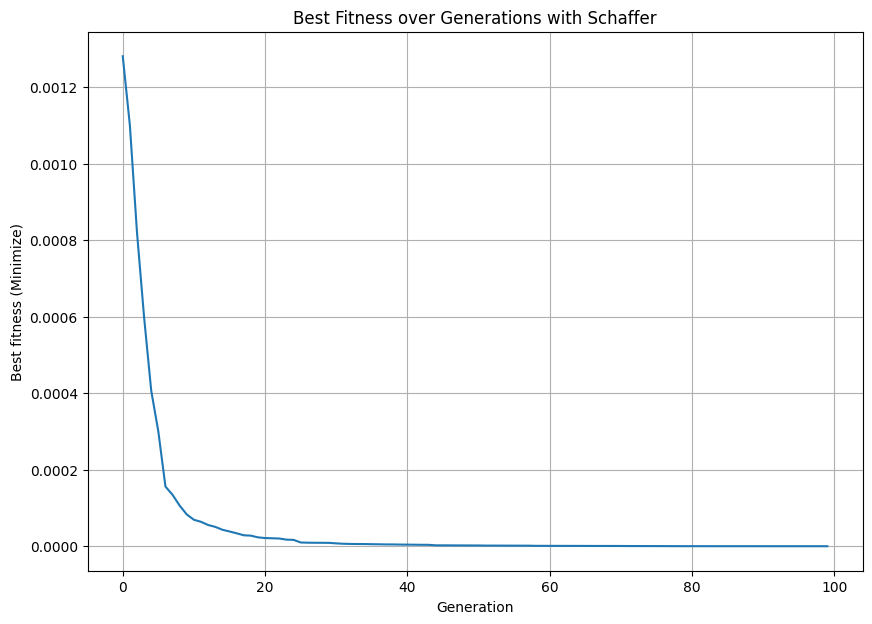

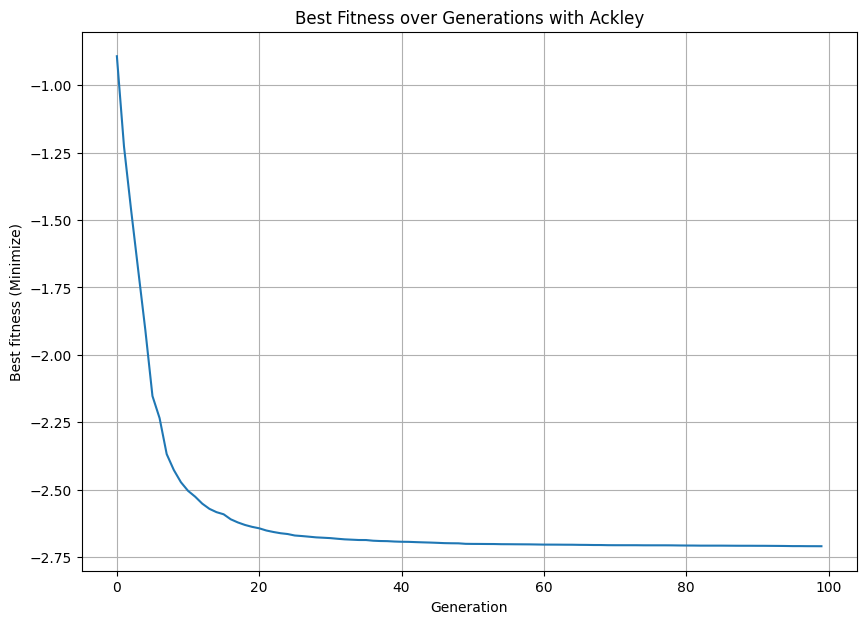

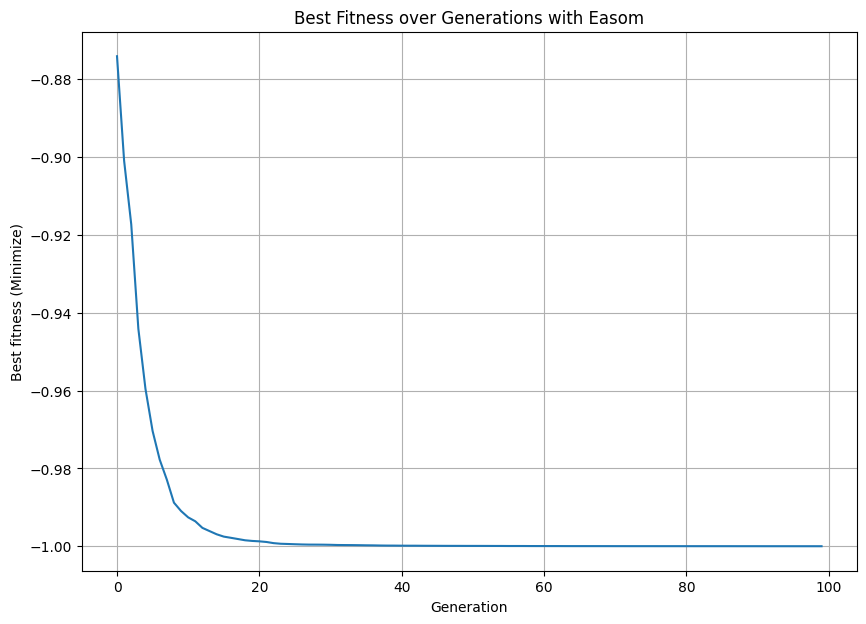

In [50]:
for i in range (len(problems)):
    findAverageOfFitness(problems[i],titles[i],False,100)

## Maximized 

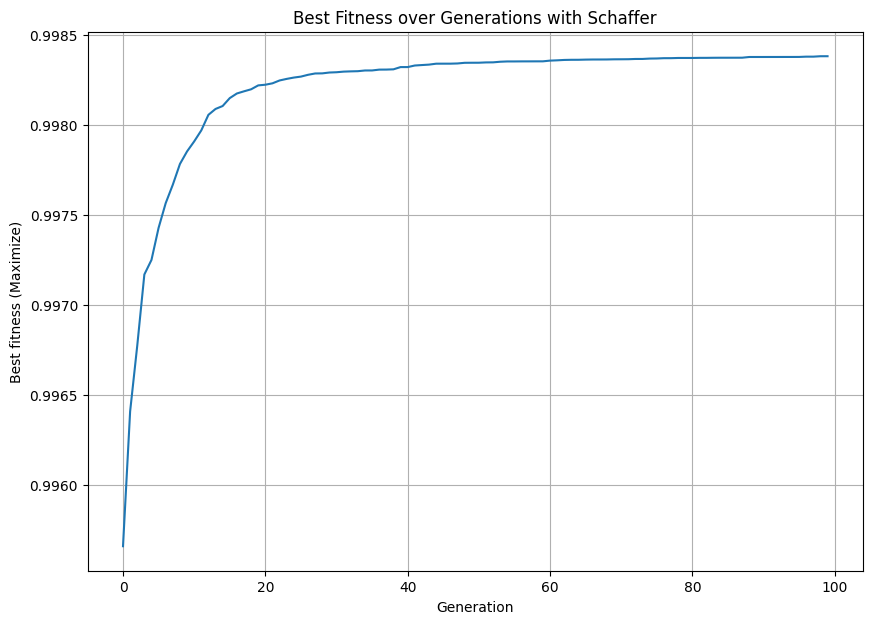

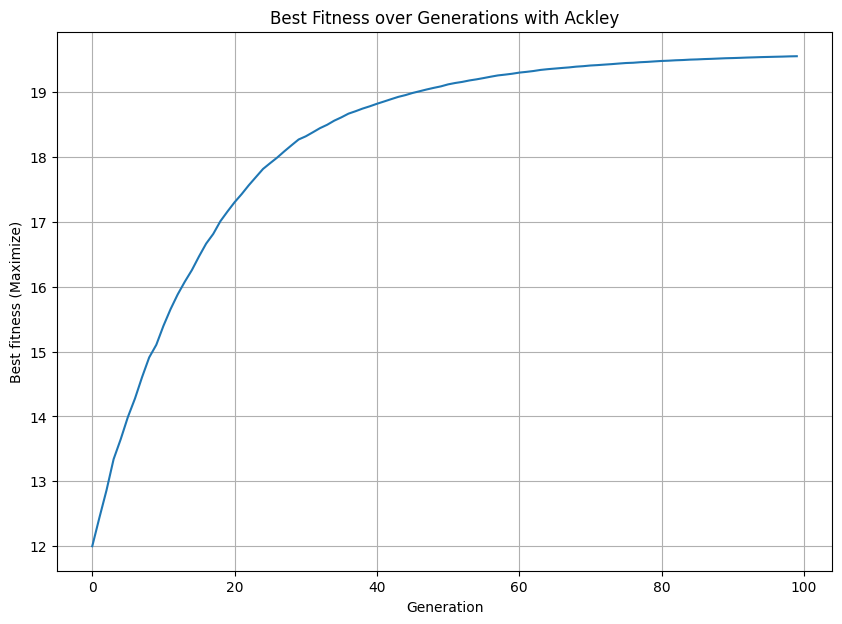

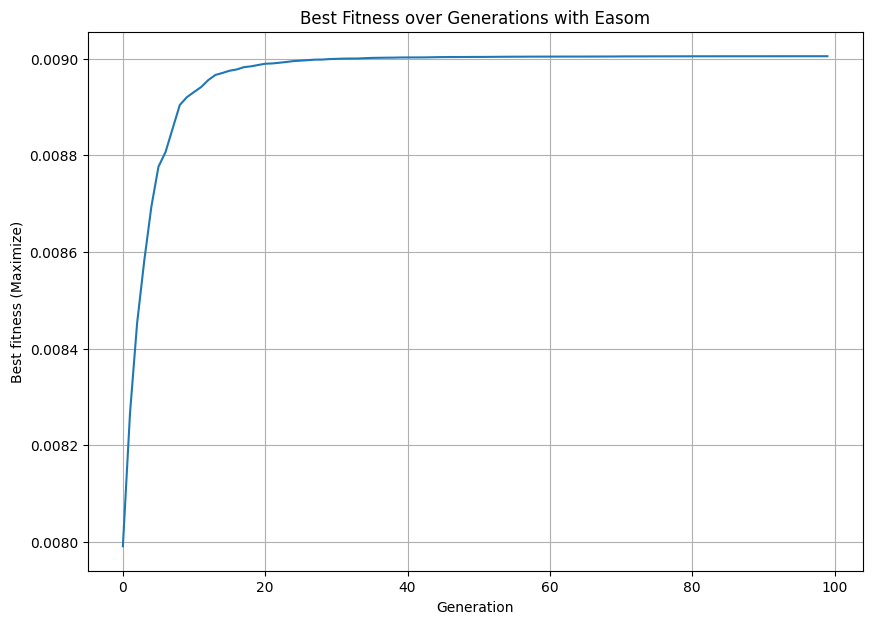

In [51]:
for i in range (len(problems)):
    findAverageOfFitness(problems[i],titles[i],True,100)